In [3]:
num_iterations = 200
print("The number of iterations is: ", num_iterations)

The number of iterations is:  200


*
optimization finished, #iter = 48
nu = 0.920000
obj = -0.894241, rho = 0.872642
nSV = 92, nBSV = 92
Total nSV = 92
Accuracy = 54% (54/100) (classification)
Accuracy = 49.7% (497/1000) (classification)
*
optimization finished, #iter = 49
nu = 0.920000
obj = -1.270081, rho = 0.816829
nSV = 93, nBSV = 91
Total nSV = 93
Accuracy = 54% (54/100) (classification)
Accuracy = 49.7% (497/1000) (classification)
*
optimization finished, #iter = 48
nu = 0.920000
obj = -1.793336, rho = 0.736518
nSV = 93, nBSV = 91
Total nSV = 93
Accuracy = 54% (54/100) (classification)
Accuracy = 49.7% (497/1000) (classification)
*
optimization finished, #iter = 49
nu = 0.920000
obj = -2.510079, rho = 0.622441
nSV = 94, nBSV = 91
Total nSV = 94
Accuracy = 54% (54/100) (classification)
Accuracy = 49.7% (497/1000) (classification)
*
optimization finished, #iter = 49
nu = 0.920000
obj = -3.466723, rho = 0.456901
nSV = 94, nBSV = 91
Total nSV = 94
Accuracy = 55% (55/100) (classification)
Accuracy = 50% (500/1000) (cla

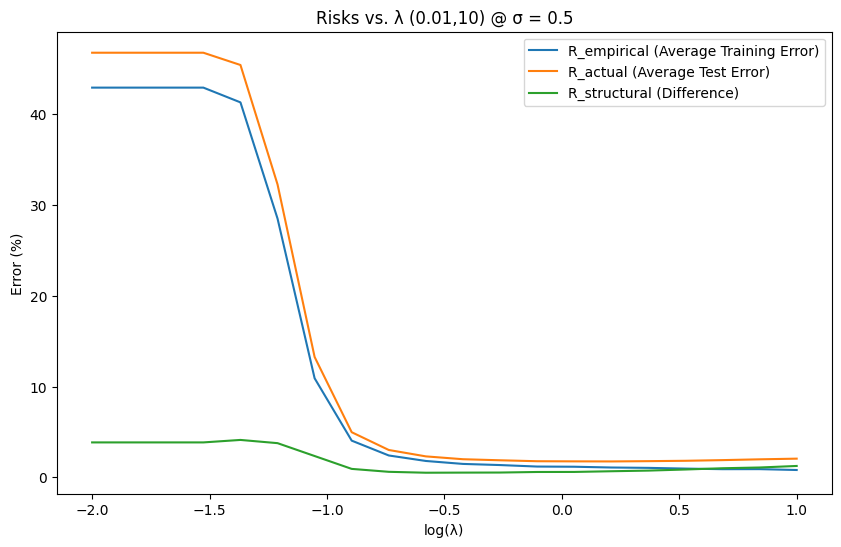

In [4]:
import numpy as np
import numpy.matlib as matlib
from libsvm.svmutil import *
import matplotlib.pyplot as plt


def data(N,sigma):   
    w = np.ones(10)/np.sqrt(10)   
    w1 = [1., 1., 1., 1., 1., -1., -1., -1., -1., -1.]/np.sqrt(10)   
    w2 = [-1., -1., 0, 1., 1., -1., -1., 0, -1., -1.]/np.sqrt(8)   
    x = np.zeros((4,10))   
    x[1,:] = x[0,:] + sigma*w1   
    x[2,:] = x[0,:] + sigma*w2   
    x[3,:] = x[2,:] + sigma*w1   
    X1 = x + sigma*matlib.repmat(w,4,1)/2   
    X2 = x - sigma*matlib.repmat(w,4,1)/2   
    X1 = matlib.repmat(X1,2*N,1)   
    X2 = matlib.repmat(X2,2*N,1)   
    X = np.concatenate((X1, X2), axis=0)   
    Y = np.concatenate((np.ones(4*2*N), -np.ones(4*2*N)),axis=0)   
    Z = np.random.permutation(16*N)   
    Z = Z[:N]   
    X = X[Z,:]   
    X = X + 0.2*sigma*np.random.randn(N,10)   
    Y = Y[Z]

    return X, Y

# Task 2a: Generating Parameter Values
lambda_values = np.logspace(-2, 1, 20)  # Logarithmically spaced values between 0.01 and 10

# Initialize arrays to store errors
training_errors = []
test_errors = []
sigma = 0.5

# Task 2b-d: Training, Testing, and Repeating the Experiment
#num_iterations = 100
for i in range(num_iterations):

    # Generate data
    X_train, y_train = data(100,sigma)
    X_test, y_test = data(1000, sigma)

    for lam in lambda_values:
        
        # Train SVM
        svm_problem_setup = svm_problem(y_train.tolist(), X_train.tolist())
        param = svm_parameter(f'-t 0 -c {lam}')
        model = svm_train(svm_problem_setup, param)
        
        # Predict on training and test data
        i, train_accuracy, i = svm_predict(y_train.tolist(), X_train.tolist(), model)
        i, test_accuracy, i = svm_predict(y_test.tolist(), X_test.tolist(), model)
        
        # Calculate errors
        training_errors.append(100 - train_accuracy[0])  # Convert to error percentage
        test_errors.append(100 - test_accuracy[0])  # Convert to error percentage

# Task 2e: Averaging Errors and Plotting
training_errors = np.array(training_errors).reshape(num_iterations, -1)
test_errors = np.array(test_errors).reshape(num_iterations, -1)

avg_training_error = np.mean(training_errors, axis=0)
avg_test_error = np.mean(test_errors, axis=0)

lambda_values_log = np.log10(lambda_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_log, avg_training_error, label='R_empirical (Average Training Error)')
plt.plot(lambda_values_log, avg_test_error, label='R_actual (Average Test Error)')
plt.plot(lambda_values_log, avg_test_error - avg_training_error, label='R_structural (Difference)')

plt.xlabel('log(λ)')
plt.ylabel('Error (%)')
plt.title('Risks vs. λ (0.01,10) @ σ = 0.5')
plt.legend()
plt.show()


*
optimization finished, #iter = 49
nu = 0.960000
obj = -0.932719, rho = 0.857246
nSV = 96, nBSV = 96
Total nSV = 96
Accuracy = 52% (52/100) (classification)
Accuracy = 50.5% (505/1000) (classification)
*
optimization finished, #iter = 49
nu = 0.960000
obj = -1.324464, rho = 0.794656
nSV = 96, nBSV = 96
Total nSV = 96
Accuracy = 52% (52/100) (classification)
Accuracy = 50.5% (505/1000) (classification)
*
optimization finished, #iter = 49
nu = 0.960000
obj = -1.869574, rho = 0.704623
nSV = 96, nBSV = 96
Total nSV = 96
Accuracy = 52% (52/100) (classification)
Accuracy = 50.5% (505/1000) (classification)
*
optimization finished, #iter = 49
nu = 0.960000
obj = -2.615625, rho = 0.575114
nSV = 96, nBSV = 96
Total nSV = 96
Accuracy = 52% (52/100) (classification)
Accuracy = 50.5% (505/1000) (classification)
*
optimization finished, #iter = 48
nu = 0.960000
obj = -3.610025, rho = 0.388823
nSV = 96, nBSV = 96
Total nSV = 96
Accuracy = 53% (53/100) (classification)
Accuracy = 51.8% (518/1000) (c

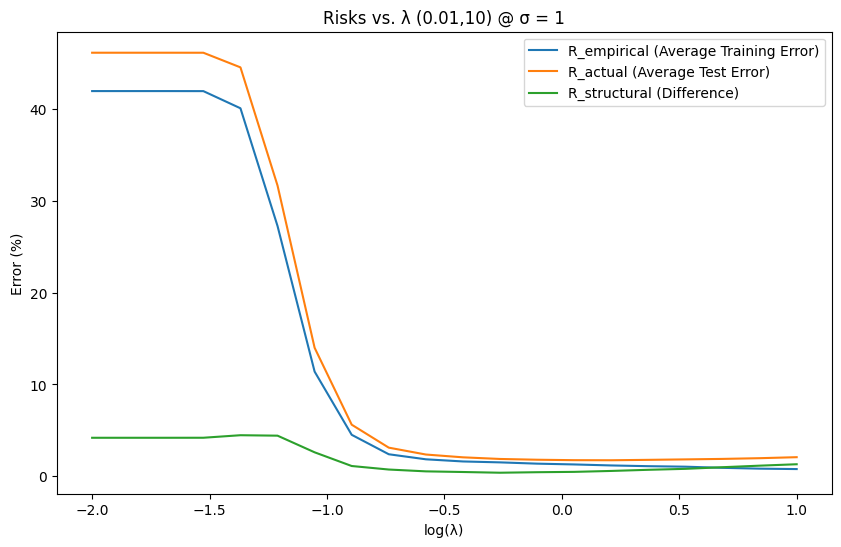

In [5]:
import numpy as np
import numpy.matlib as matlib
from libsvm.svmutil import *
import matplotlib.pyplot as plt


def data(N,sigma):   
    w = np.ones(10)/np.sqrt(10)   
    w1 = [1., 1., 1., 1., 1., -1., -1., -1., -1., -1.]/np.sqrt(10)   
    w2 = [-1., -1., 0, 1., 1., -1., -1., 0, -1., -1.]/np.sqrt(8)   
    x = np.zeros((4,10))   
    x[1,:] = x[0,:] + sigma*w1   
    x[2,:] = x[0,:] + sigma*w2   
    x[3,:] = x[2,:] + sigma*w1   
    X1 = x + sigma*matlib.repmat(w,4,1)/2   
    X2 = x - sigma*matlib.repmat(w,4,1)/2   
    X1 = matlib.repmat(X1,2*N,1)   
    X2 = matlib.repmat(X2,2*N,1)   
    X = np.concatenate((X1, X2), axis=0)   
    Y = np.concatenate((np.ones(4*2*N), -np.ones(4*2*N)),axis=0)   
    Z = np.random.permutation(16*N)   
    Z = Z[:N]   
    X = X[Z,:]   
    X = X + 0.2*sigma*np.random.randn(N,10)   
    Y = Y[Z]

    return X, Y

# Task 2a: Generating Parameter Values
lambda_values = np.logspace(-2, 1, 20)  # Logarithmically spaced values between 0.01 and 10

# Initialize arrays to store errors
training_errors = []
test_errors = []
sigma = 0.5

# Task 2b-d: Training, Testing, and Repeating the Experiment
# num_iterations = 100
for i in range(num_iterations):

    # Generate data
    X_train, y_train = data(100,sigma)
    X_test, y_test = data(1000, sigma)

    for lam in lambda_values:
        
        # Train SVM
        svm_problem_setup = svm_problem(y_train.tolist(), X_train.tolist())
        param = svm_parameter(f'-t 0 -c {lam}')
        model = svm_train(svm_problem_setup, param)
        
        # Predict on training and test data
        i, train_accuracy, i = svm_predict(y_train.tolist(), X_train.tolist(), model)
        i, test_accuracy, i = svm_predict(y_test.tolist(), X_test.tolist(), model)
        
        # Calculate errors
        training_errors.append(100 - train_accuracy[0])  # Convert to error percentage
        test_errors.append(100 - test_accuracy[0])  # Convert to error percentage

# Task 2e: Averaging Errors and Plotting
training_errors = np.array(training_errors).reshape(num_iterations, -1)
test_errors = np.array(test_errors).reshape(num_iterations, -1)

avg_training_error = np.mean(training_errors, axis=0)
avg_test_error = np.mean(test_errors, axis=0)

lambda_values_log = np.log10(lambda_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_log, avg_training_error, label='R_empirical (Average Training Error)')
plt.plot(lambda_values_log, avg_test_error, label='R_actual (Average Test Error)')
plt.plot(lambda_values_log, avg_test_error - avg_training_error, label='R_structural (Difference)')

plt.xlabel('log(λ)')
plt.ylabel('Error (%)')
plt.title('Risks vs. λ (0.01,10) @ σ = 1')
plt.legend()
plt.show()


*
optimization finished, #iter = 39
nu = 0.576530
obj = -0.380738, rho = -0.186063
nSV = 59, nBSV = 55
Total nSV = 59
Accuracy = 100% (100/100) (classification)
Accuracy = 98.3% (983/1000) (classification)
*
optimization finished, #iter = 52
nu = 0.468826
obj = -0.456413, rho = -0.252658
nSV = 51, nBSV = 45
Total nSV = 51
Accuracy = 100% (100/100) (classification)
Accuracy = 98.3% (983/1000) (classification)
*
optimization finished, #iter = 34
nu = 0.400000
obj = -0.551934, rho = -0.248054
nSV = 41, nBSV = 38
Total nSV = 41
Accuracy = 100% (100/100) (classification)
Accuracy = 98.5% (985/1000) (classification)
*
optimization finished, #iter = 35
nu = 0.344768
obj = -0.653207, rho = -0.120397
nSV = 37, nBSV = 33
Total nSV = 37
Accuracy = 100% (100/100) (classification)
Accuracy = 98.7% (987/1000) (classification)
*
optimization finished, #iter = 44
nu = 0.280534
obj = -0.762595, rho = -0.133010
nSV = 30, nBSV = 25
Total nSV = 30
Accuracy = 100% (100/100) (classification)
Accuracy = 98.8

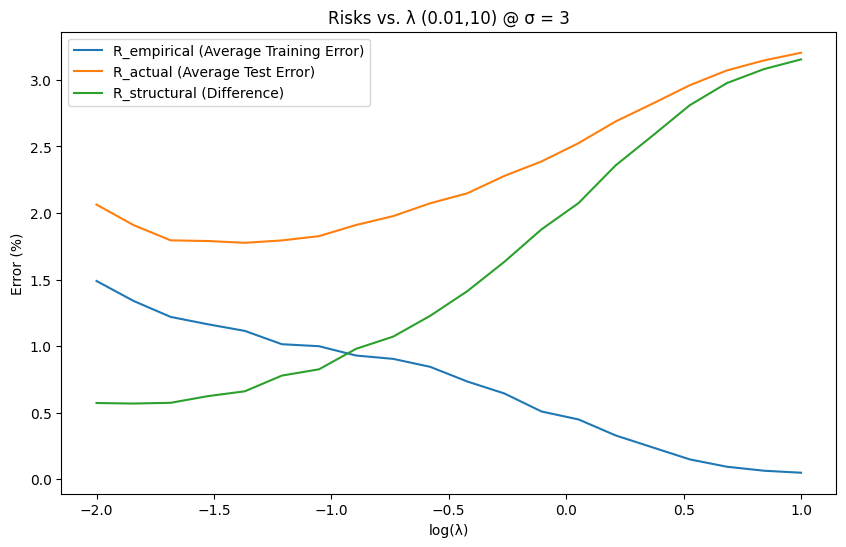

In [6]:
import numpy as np
import numpy.matlib as matlib
from libsvm.svmutil import *
import matplotlib.pyplot as plt


def data(N,sigma):   
    w = np.ones(10)/np.sqrt(10)   
    w1 = [1., 1., 1., 1., 1., -1., -1., -1., -1., -1.]/np.sqrt(10)   
    w2 = [-1., -1., 0, 1., 1., -1., -1., 0, -1., -1.]/np.sqrt(8)   
    x = np.zeros((4,10))   
    x[1,:] = x[0,:] + sigma*w1   
    x[2,:] = x[0,:] + sigma*w2   
    x[3,:] = x[2,:] + sigma*w1   
    X1 = x + sigma*matlib.repmat(w,4,1)/2   
    X2 = x - sigma*matlib.repmat(w,4,1)/2   
    X1 = matlib.repmat(X1,2*N,1)   
    X2 = matlib.repmat(X2,2*N,1)   
    X = np.concatenate((X1, X2), axis=0)   
    Y = np.concatenate((np.ones(4*2*N), -np.ones(4*2*N)),axis=0)   
    Z = np.random.permutation(16*N)   
    Z = Z[:N]   
    X = X[Z,:]   
    X = X + 0.2*sigma*np.random.randn(N,10)   
    Y = Y[Z]

    return X, Y

# Task 2a: Generating Parameter Values
lambda_values = np.logspace(-2, 1, 20)  # Logarithmically spaced values between 0.01 and 10

# Initialize arrays to store errors
training_errors = []
test_errors = []
sigma = 3

# Task 2b-d: Training, Testing, and Repeating the Experiment
# num_iterations = 100
for i in range(num_iterations):

    # Generate data
    X_train, y_train = data(100,sigma)
    X_test, y_test = data(1000, sigma)

    for lam in lambda_values:
        
        # Train SVM
        svm_problem_setup = svm_problem(y_train.tolist(), X_train.tolist())
        param = svm_parameter(f'-t 0 -c {lam}')
        model = svm_train(svm_problem_setup, param)
        
        # Predict on training and test data
        i, train_accuracy, i = svm_predict(y_train.tolist(), X_train.tolist(), model)
        i, test_accuracy, i = svm_predict(y_test.tolist(), X_test.tolist(), model)
        
        # Calculate errors
        training_errors.append(100 - train_accuracy[0])  # Convert to error percentage
        test_errors.append(100 - test_accuracy[0])  # Convert to error percentage

# Task 2e: Averaging Errors and Plotting
training_errors = np.array(training_errors).reshape(num_iterations, -1)
test_errors = np.array(test_errors).reshape(num_iterations, -1)

avg_training_error = np.mean(training_errors, axis=0)
avg_test_error = np.mean(test_errors, axis=0)

lambda_values_log = np.log10(lambda_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_log, avg_training_error, label='R_empirical (Average Training Error)')
plt.plot(lambda_values_log, avg_test_error, label='R_actual (Average Test Error)')
plt.plot(lambda_values_log, avg_test_error - avg_training_error, label='R_structural (Difference)')

plt.xlabel('log(λ)')
plt.ylabel('Error (%)')
plt.title('Risks vs. λ (0.01,10) @ σ = 3')
plt.legend()
plt.show()


*
optimization finished, #iter = 47
nu = 0.920653
obj = -6.893917, rho = -0.208724
nSV = 94, nBSV = 92
Total nSV = 94
Accuracy = 96% (96/100) (classification)
Accuracy = 97% (970/1000) (classification)
*
optimization finished, #iter = 43
nu = 0.860000
obj = -8.071775, rho = -0.196091
nSV = 86, nBSV = 86
Total nSV = 86
Accuracy = 96% (96/100) (classification)
Accuracy = 97.2% (972/1000) (classification)
*
optimization finished, #iter = 41
nu = 0.807649
obj = -9.382671, rho = -0.181255
nSV = 82, nBSV = 80
Total nSV = 82
Accuracy = 97% (97/100) (classification)
Accuracy = 97.7% (977/1000) (classification)
*
optimization finished, #iter = 39
nu = 0.747182
obj = -10.815554, rho = -0.208027
nSV = 76, nBSV = 73
Total nSV = 76
Accuracy = 96% (96/100) (classification)
Accuracy = 98% (980/1000) (classification)
*
optimization finished, #iter = 48
nu = 0.673562
obj = -12.404873, rho = -0.127842
nSV = 70, nBSV = 65
Total nSV = 70
Accuracy = 97% (97/100) (classification)
Accuracy = 98.2% (982/1000)

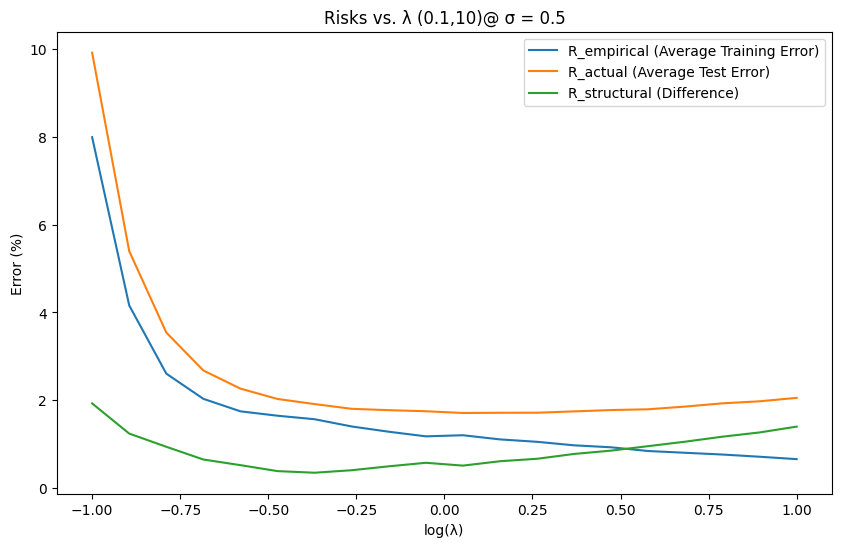

In [7]:
import numpy as np
import numpy.matlib as matlib
from libsvm.svmutil import *
import matplotlib.pyplot as plt


def data(N,sigma):   
    w = np.ones(10)/np.sqrt(10)   
    w1 = [1., 1., 1., 1., 1., -1., -1., -1., -1., -1.]/np.sqrt(10)   
    w2 = [-1., -1., 0, 1., 1., -1., -1., 0, -1., -1.]/np.sqrt(8)   
    x = np.zeros((4,10))   
    x[1,:] = x[0,:] + sigma*w1   
    x[2,:] = x[0,:] + sigma*w2   
    x[3,:] = x[2,:] + sigma*w1   
    X1 = x + sigma*matlib.repmat(w,4,1)/2   
    X2 = x - sigma*matlib.repmat(w,4,1)/2   
    X1 = matlib.repmat(X1,2*N,1)   
    X2 = matlib.repmat(X2,2*N,1)   
    X = np.concatenate((X1, X2), axis=0)   
    Y = np.concatenate((np.ones(4*2*N), -np.ones(4*2*N)),axis=0)   
    Z = np.random.permutation(16*N)   
    Z = Z[:N]   
    X = X[Z,:]   
    X = X + 0.2*sigma*np.random.randn(N,10)   
    Y = Y[Z]

    return X, Y

# Task 2a: Generating Parameter Values
lambda_values = np.logspace(-1, 1, 20)  # Logarithmically spaced values between 0.01 and 10

# Initialize arrays to store errors
training_errors = []
test_errors = []
sigma = 0.5

# Task 2b-d: Training, Testing, and Repeating the Experiment
# num_iterations = 100
for i in range(num_iterations):

    # Generate data
    X_train, y_train = data(100,sigma)
    X_test, y_test = data(1000, sigma)

    for lam in lambda_values:
        
        # Train SVM
        svm_problem_setup = svm_problem(y_train.tolist(), X_train.tolist())
        param = svm_parameter(f'-t 0 -c {lam}')
        model = svm_train(svm_problem_setup, param)
        
        # Predict on training and test data
        i, train_accuracy, i = svm_predict(y_train.tolist(), X_train.tolist(), model)
        i, test_accuracy, i = svm_predict(y_test.tolist(), X_test.tolist(), model)
        
        # Calculate errors
        training_errors.append(100 - train_accuracy[0])  # Convert to error percentage
        test_errors.append(100 - test_accuracy[0])  # Convert to error percentage

# Task 2e: Averaging Errors and Plotting
training_errors = np.array(training_errors).reshape(num_iterations, -1)
test_errors = np.array(test_errors).reshape(num_iterations, -1)

avg_training_error = np.mean(training_errors, axis=0)
avg_test_error = np.mean(test_errors, axis=0)

lambda_values_log = np.log10(lambda_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_log, avg_training_error, label='R_empirical (Average Training Error)')
plt.plot(lambda_values_log, avg_test_error, label='R_actual (Average Test Error)')
plt.plot(lambda_values_log, avg_test_error - avg_training_error, label='R_structural (Difference)')

plt.xlabel('log(λ)')
plt.ylabel('Error (%)')
plt.title('Risks vs. λ (0.1,10)@ σ = 0.5')
plt.legend()
plt.show()


*
optimization finished, #iter = 41
nu = 0.524674
obj = -3.426639, rho = 0.054033
nSV = 55, nBSV = 49
Total nSV = 55
Accuracy = 99% (99/100) (classification)
Accuracy = 97.5% (975/1000) (classification)
*
optimization finished, #iter = 52
nu = 0.456950
obj = -3.849325, rho = 0.089089
nSV = 49, nBSV = 43
Total nSV = 49
Accuracy = 99% (99/100) (classification)
Accuracy = 97.6% (976/1000) (classification)
*
optimization finished, #iter = 34
nu = 0.407930
obj = -4.317322, rho = 0.087179
nSV = 43, nBSV = 37
Total nSV = 43
Accuracy = 99% (99/100) (classification)
Accuracy = 96.8% (968/1000) (classification)
*
optimization finished, #iter = 38
nu = 0.360909
obj = -4.830806, rho = 0.080314
nSV = 39, nBSV = 32
Total nSV = 39
Accuracy = 99% (99/100) (classification)
Accuracy = 97.5% (975/1000) (classification)
*
optimization finished, #iter = 35
nu = 0.317275
obj = -5.406955, rho = 0.141655
nSV = 33, nBSV = 28
Total nSV = 33
Accuracy = 100% (100/100) (classification)
Accuracy = 97.3% (973/1000) 

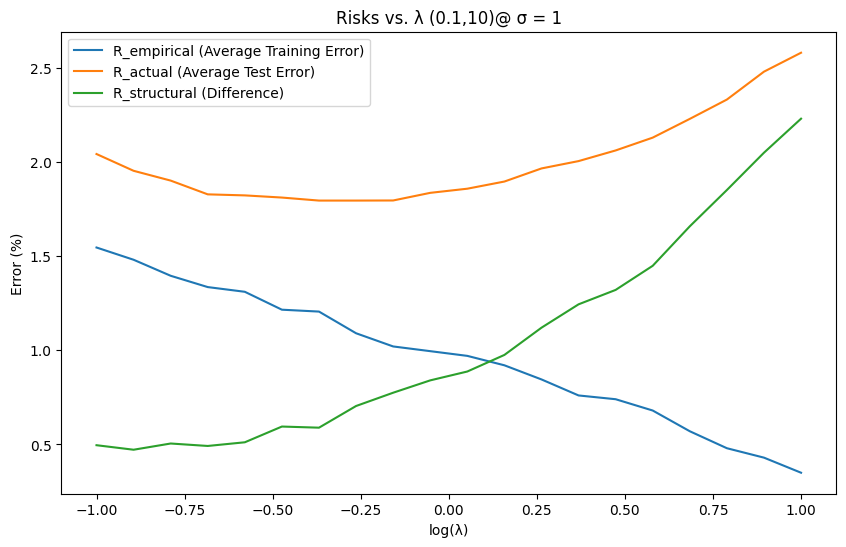

In [8]:
import numpy as np
import numpy.matlib as matlib
from libsvm.svmutil import *
import matplotlib.pyplot as plt


def data(N,sigma):   
    w = np.ones(10)/np.sqrt(10)   
    w1 = [1., 1., 1., 1., 1., -1., -1., -1., -1., -1.]/np.sqrt(10)   
    w2 = [-1., -1., 0, 1., 1., -1., -1., 0, -1., -1.]/np.sqrt(8)   
    x = np.zeros((4,10))   
    x[1,:] = x[0,:] + sigma*w1   
    x[2,:] = x[0,:] + sigma*w2   
    x[3,:] = x[2,:] + sigma*w1   
    X1 = x + sigma*matlib.repmat(w,4,1)/2   
    X2 = x - sigma*matlib.repmat(w,4,1)/2   
    X1 = matlib.repmat(X1,2*N,1)   
    X2 = matlib.repmat(X2,2*N,1)   
    X = np.concatenate((X1, X2), axis=0)   
    Y = np.concatenate((np.ones(4*2*N), -np.ones(4*2*N)),axis=0)   
    Z = np.random.permutation(16*N)   
    Z = Z[:N]   
    X = X[Z,:]   
    X = X + 0.2*sigma*np.random.randn(N,10)   
    Y = Y[Z]

    return X, Y

# Task 2a: Generating Parameter Values
lambda_values = np.logspace(-1, 1, 20)  # Logarithmically spaced values between 0.01 and 10

# Initialize arrays to store errors
training_errors = []
test_errors = []
sigma = 1

# Task 2b-d: Training, Testing, and Repeating the Experiment
# num_iterations = 100
for i in range(num_iterations):

    # Generate data
    X_train, y_train = data(100,sigma)
    X_test, y_test = data(1000, sigma)

    for lam in lambda_values:
        
        # Train SVM
        svm_problem_setup = svm_problem(y_train.tolist(), X_train.tolist())
        param = svm_parameter(f'-t 0 -c {lam}')
        model = svm_train(svm_problem_setup, param)
        
        # Predict on training and test data
        i, train_accuracy, i = svm_predict(y_train.tolist(), X_train.tolist(), model)
        i, test_accuracy, i = svm_predict(y_test.tolist(), X_test.tolist(), model)
        
        # Calculate errors
        training_errors.append(100 - train_accuracy[0])  # Convert to error percentage
        test_errors.append(100 - test_accuracy[0])  # Convert to error percentage

# Task 2e: Averaging Errors and Plotting
training_errors = np.array(training_errors).reshape(num_iterations, -1)
test_errors = np.array(test_errors).reshape(num_iterations, -1)

avg_training_error = np.mean(training_errors, axis=0)
avg_test_error = np.mean(test_errors, axis=0)

lambda_values_log = np.log10(lambda_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_log, avg_training_error, label='R_empirical (Average Training Error)')
plt.plot(lambda_values_log, avg_test_error, label='R_actual (Average Test Error)')
plt.plot(lambda_values_log, avg_test_error - avg_training_error, label='R_structural (Difference)')

plt.xlabel('log(λ)')
plt.ylabel('Error (%)')
plt.title('Risks vs. λ (0.1,10)@ σ = 1')
plt.legend()
plt.show()

*
optimization finished, #iter = 38
nu = 0.190142
obj = -1.211850, rho = 0.037704
nSV = 22, nBSV = 15
Total nSV = 22
Accuracy = 100% (100/100) (classification)
Accuracy = 97.8% (978/1000) (classification)
.*
optimization finished, #iter = 128
nu = 0.168626
obj = -1.335853, rho = 0.154344
nSV = 20, nBSV = 11
Total nSV = 20
Accuracy = 100% (100/100) (classification)
Accuracy = 98.2% (982/1000) (classification)
.*
optimization finished, #iter = 146
nu = 0.142376
obj = -1.475279, rho = 0.175642
nSV = 19, nBSV = 10
Total nSV = 19
Accuracy = 100% (100/100) (classification)
Accuracy = 98.2% (982/1000) (classification)
*
optimization finished, #iter = 94
nu = 0.124389
obj = -1.630865, rho = 0.163166
nSV = 17, nBSV = 7
Total nSV = 17
Accuracy = 100% (100/100) (classification)
Accuracy = 98% (980/1000) (classification)
*
optimization finished, #iter = 72
nu = 0.108915
obj = -1.811548, rho = 0.154842
nSV = 16, nBSV = 6
Total nSV = 16
Accuracy = 100% (100/100) (classification)
Accuracy = 97.5% (97

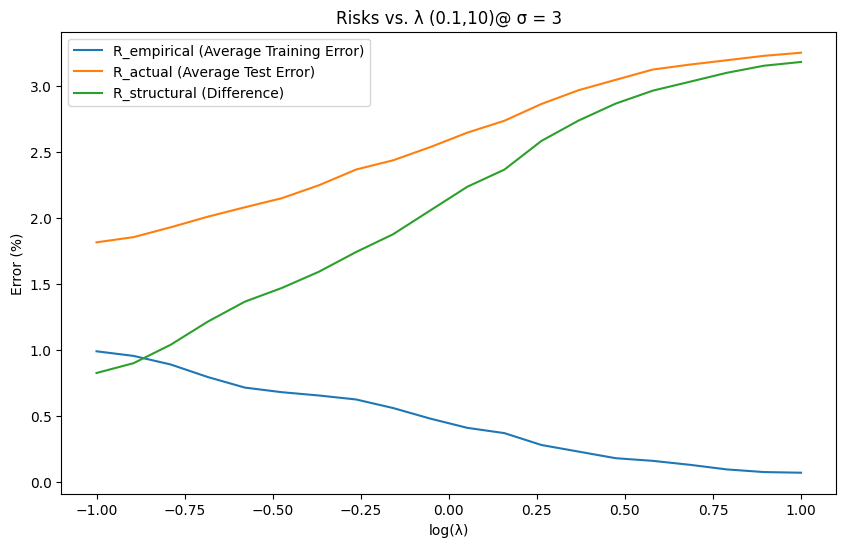

In [9]:
import numpy as np
import numpy.matlib as matlib
from libsvm.svmutil import *
import matplotlib.pyplot as plt


def data(N,sigma):   
    w = np.ones(10)/np.sqrt(10)   
    w1 = [1., 1., 1., 1., 1., -1., -1., -1., -1., -1.]/np.sqrt(10)   
    w2 = [-1., -1., 0, 1., 1., -1., -1., 0, -1., -1.]/np.sqrt(8)   
    x = np.zeros((4,10))   
    x[1,:] = x[0,:] + sigma*w1   
    x[2,:] = x[0,:] + sigma*w2   
    x[3,:] = x[2,:] + sigma*w1   
    X1 = x + sigma*matlib.repmat(w,4,1)/2   
    X2 = x - sigma*matlib.repmat(w,4,1)/2   
    X1 = matlib.repmat(X1,2*N,1)   
    X2 = matlib.repmat(X2,2*N,1)   
    X = np.concatenate((X1, X2), axis=0)   
    Y = np.concatenate((np.ones(4*2*N), -np.ones(4*2*N)),axis=0)   
    Z = np.random.permutation(16*N)   
    Z = Z[:N]   
    X = X[Z,:]   
    X = X + 0.2*sigma*np.random.randn(N,10)   
    Y = Y[Z]

    return X, Y

# Task 2a: Generating Parameter Values
lambda_values = np.logspace(-1, 1, 20)  # Logarithmically spaced values between 0.01 and 10

# Initialize arrays to store errors
training_errors = []
test_errors = []
sigma = 3

# Task 2b-d: Training, Testing, and Repeating the Experiment
# num_iterations = 100
for i in range(num_iterations):

    # Generate data
    X_train, y_train = data(100,sigma)
    X_test, y_test = data(1000, sigma)

    for lam in lambda_values:
        
        # Train SVM
        svm_problem_setup = svm_problem(y_train.tolist(), X_train.tolist())
        param = svm_parameter(f'-t 0 -c {lam}')
        model = svm_train(svm_problem_setup, param)
        
        # Predict on training and test data
        i, train_accuracy, i = svm_predict(y_train.tolist(), X_train.tolist(), model)
        i, test_accuracy, i = svm_predict(y_test.tolist(), X_test.tolist(), model)
        
        # Calculate errors
        training_errors.append(100 - train_accuracy[0])  # Convert to error percentage
        test_errors.append(100 - test_accuracy[0])  # Convert to error percentage

# Task 2e: Averaging Errors and Plotting
training_errors = np.array(training_errors).reshape(num_iterations, -1)
test_errors = np.array(test_errors).reshape(num_iterations, -1)

avg_training_error = np.mean(training_errors, axis=0)
avg_test_error = np.mean(test_errors, axis=0)

lambda_values_log = np.log10(lambda_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_log, avg_training_error, label='R_empirical (Average Training Error)')
plt.plot(lambda_values_log, avg_test_error, label='R_actual (Average Test Error)')
plt.plot(lambda_values_log, avg_test_error - avg_training_error, label='R_structural (Difference)')

plt.xlabel('log(λ)')
plt.ylabel('Error (%)')
plt.title('Risks vs. λ (0.1,10)@ σ = 3')
plt.legend()
plt.show()